In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio

In [2]:
class cell():
    def mito(self):
        N = 100 
        frames = 60 
        limit = 100 
        L  = limit*2
        P = 10 
        V = 10 
        delta = 1 
        c1 = 0.0002 
        c2 = 0 
        c3 = 4 
        c4 = 0.2 
        vlimit = 1 
        filenames = []

        p = P*np.random.randn(2,N)
        v = V*np.random.randn(2,N)
        
        plt.ion()
        fig = plt.figure(figsize=(10,5))
        ax = fig.add_subplot(111)

        for i in range(frames):
            v1 = np.zeros((2,N+2))
            v2 = np.zeros((2,N+2))                 
            v3 = ( (np.sum(v[0,:])/(N) ) + (np.sum(v[1,:])/(N)) ) * c3;  
            v4 = np.zeros((2,N))
            
            if (np.linalg.norm(v3) > vlimit):
                v3 *= vlimit / np.linalg.norm(v3)
            for n in range(N):
                for m in range(N):
                    if m!=n:
                        r = p[:,m] - p[:,n] 
                        if r[0] > L/2:
                            r[0] -= L
                        elif r[0] < -L/2:
                            r[0] += L
                        if r[1] > L/2:
                            r[1] -= L
                        elif r[1] < -L/2:
                            r[1] += L
                        rmag = np.sqrt( r[0]**2  + r[1]**2 )
                        v1[:,n] += c1*r 
                        v2[:,n] -= (c2 * r) / (rmag**2)     
                v4[:,n] = c4 * np.random.randn(2)               
                v[:,n] = v1[:,n] + v2[:,n] + v3 + v4[:,n]
            for n in range(0, N):    
                p[:,n] +=  v[:,n] * delta 
            tmp_p = p
            tmp_p[0, p[0,:] >  L/2]  = tmp_p[0,p[0,:]> (L/2)] - L
            tmp_p[1, p[1,:] >  L/2]  = tmp_p[1, p[1,:] > (L/2)] - L
            tmp_p[0, p[0,:] < -L/2]  = tmp_p[0, p[0,:] < (-L/2)] + L
            tmp_p[1, p[1,:] < -L/2]  = tmp_p[1, p[1,:] < (-L/2)] + L
            p = tmp_p
            colors = "orange"
            ax.clear()
            ax.scatter(p[0,:], p[1,:], c=colors, alpha=1)
            plt.xlim(-limit, limit)
            plt.ylim(-limit, limit)
            fig.canvas.draw()

            plt.savefig('frames/frame' + str(i) +'.png')
            filenames.append('frames/frame' + str(i) + '.jpg')
            plt.savefig(filenames[i])
        images = []
        for filename in filenames:
           images.append(imageio.imread(filename))
        imageio.mimsave('2D_sim.gif',images)            

FileNotFoundError: [Errno 2] No such file or directory: 'original_frames/boids0.png'

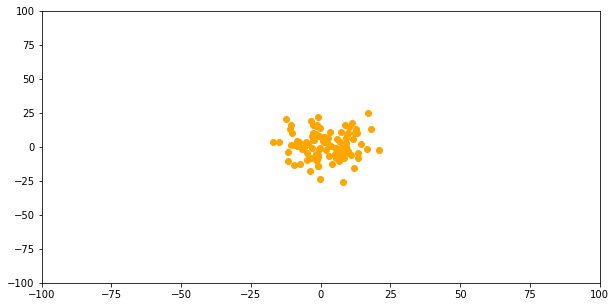

In [3]:
cell_py = cell()
cell_py.mito()